In [1]:
import hoomd
import ex_render

# Initializing the system with a lattice

Before you can begin a simulation, you must specify the initial conditions of the particles and the periodic box dimensions. HOOMD provides a number of ways to set initial conditions. You can create particles on a lattice, read the configuration from a file, or specify data directly in python.

## Create a lattice

HOOMD can place particles on a lattice. HOOMD includes several standard lattices. Here is a square lattice in 2D:

In [2]:
hoomd.context.initialize('');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.sq(a=1.2), n=16);

HOOMD-blue v2.1.5 CUDA (7.5) DOUBLE HPMC_MIXED MPI SSE SSE2 SSE3 SSE4_1 SSE4_2 AVX 
Compiled: 03/12/2017
Copyright 2009-2016 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
notice(2): This system is not compute exclusive, using local rank to select GPUs
notice(2): Unable to identify node local rank information
notice(2): Using global rank to select GPUs
HOOMD-blue is running on the following GPU(s):
 [0]            Tesla K20c  13 SM_3.5 @ 0.706 GHz, 5060 MiB DRAM
notice(2): Group "all" created containing 256 

Examine how the system configuration evolves over time. [ex_render](ex_render.py) is a helper script that builds animated gifs from trajectory files and system snapshots. It is part of the [hoomd-examples](https://bitbucket.org/glotzer/hoomd-examples) repository and designed only to render these examples.

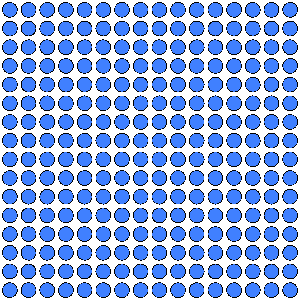

In [3]:
ex_render.render_disk_frame(system.take_snapshot(all=True))

Here is a hexagonal lattice:

In [4]:
hoomd.context.initialize('');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.hex(a=1.2), n=[16, 9]);

notice(2): Group "all" created containing 288 particles


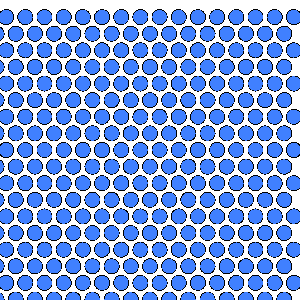

In [5]:
ex_render.render_disk_frame(system.take_snapshot(all=True))

And here is fcc.

In [6]:
hoomd.context.initialize('');
system = hoomd.init.create_lattice(unitcell=hoomd.lattice.fcc(a=1.2), n=8);

notice(2): Group "all" created containing 2048 particles


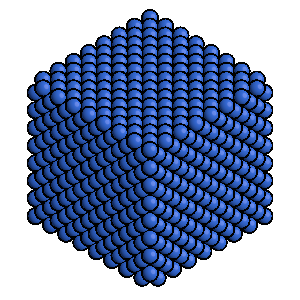

In [7]:
ex_render.render_sphere_frame(system.take_snapshot(all=True))

### Lattice defaults

By default, the lattice generator names all particles A, and gives them mass 1.0, charge 0, diameter 1, moment of inertia [0,0,0], and orientation [1,0,0,0]. You can change the type name of the basic lattices in the argument list. Here is an example of a rectangular unit cell with two particle types of different sizes. The generic ``unitcell`` command takes in arbitrary unit cell vectors, along with positions, type names, mass, charge, etc... for every particle in the unit cell.

In [8]:
hoomd.context.initialize('');
uc = hoomd.lattice.unitcell(N=2,
                            a1=[1, 0, 0],
                            a2=[0, 2, 0],
                            a3=[0, 0, 1],
                            dimensions=2,
                            position=[[0,0,0], [0.5, 1, 0]],
                            type_name=['A', 'B'],
                            diameter=[1.0, 0.5]);
system = hoomd.init.create_lattice(unitcell=uc, n=[16, 8]);

notice(2): Group "all" created containing 256 particles


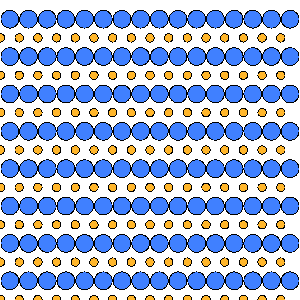

In [9]:
ex_render.render_disk_frame(system.take_snapshot(all=True))

### A lattice of molecules

You can use the `unitcell` command to help build a lattice of molecules. As of hoomd v2.0, `unitcell` does not allow topology specification. But you can add bond topology manually using the snapshot.

In [10]:
hoomd.context.initialize('');
uc = hoomd.lattice.unitcell(N=2,
                            a1=[2, 0, 0],
                            a2=[0, 2, 0],
                            a3=[0, 0, 1],
                            dimensions=2,
                            position=[[0,0,0], [0.6, 0.6, 0]],
                            type_name=['A', 'B']);

# Get a snapshot from the unitcell and add in bond topology
snap = uc.get_snapshot();
snap.bonds.resize(1);
snap.bonds.group[0] = [0, 1];
snap.bonds.types = ['bondA'];

# replicate the lattice and initialize hoomd
snap.replicate(4,4,1);
system = hoomd.init.read_snapshot(snap);

notice(2): Group "all" created containing 32 particles


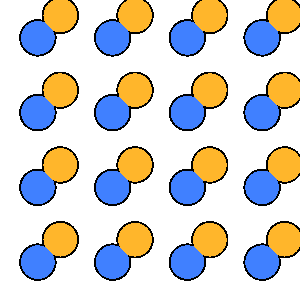

In [11]:
ex_render.render_disk_frame(system.take_snapshot(all=True))